In [1]:
import scipy.io as sio
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from random import choice
import operator

In [2]:
def read_graph(filename):
    # read graph from edgelist file
    g = nx.Graph()
    
    f = open(filename)
    for l in f:
        l = l.rstrip().replace(" ", ";").replace(",", ";").replace("\t", ";").split(";")
        g.add_edge(l[0], l[1])
    return g
G = read_graph('Dataset/socfb_Sample.csv')

In [3]:
#AVERAGE DEGREE--> NUMERO MEDIO DI LINK CONNESSI AI NODI
def average_degree(graph):
    N, K = graph.order(), graph.size()
    return float(K) / N

In [ ]:
#N° NODI---N° ARCHI---DESITA'---GRADO MEDIO---AVG. CLUSTERING COEFFICIENT
def base_stats(graph):
    lista={}
    # compute some basilar stats
    nodes = graph.number_of_nodes()
    edges = graph.number_of_edges()
    density = nx.density(graph)
    avg = average_degree(graph)
    c_coeff = nx.average_clustering(graph)
    component=nx.number_connected_components(graph)
    lista['nodes']=nodes
    lista['edges']=edges
    lista['density']=density
    lista['avg']=avg
    lista['cluster']=c_coeff
    lista['component']=component
    return lista
    
print (base_stats(G))
#nx.draw(g)

In [ ]:
k = {}
a = {}
b = {}
for c in range(2,10):
    click = list(nx.k_clique_communities(G, c))
    k[c] = len(click)
k

In [6]:
a = list(k.keys())
b = list()
for i in range(2,10):
    b.append(k[i])

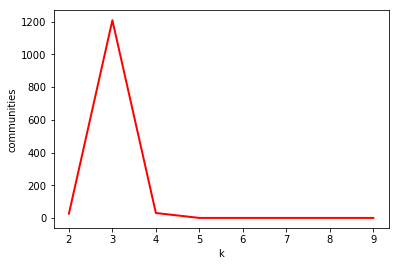

In [7]:
plt.plot(a,b,'-',linewidth=2, color='red')
plt.xlabel('k')
plt.ylabel('communities')
plt.show()

In [ ]:
cliques= nx.find_cliques(G)
cliques2= [clq for clq in cliques if len(clq)>=2]
nodes_2= [n for clq in cliques2 for n in clq]
h2=G.subgraph(nodes_2)
print (base_stats(h2))

In [ ]:
cliques= nx.find_cliques(G)
cliques3= [clq for clq in cliques if len(clq)>=3]
nodes_3= [n for clq in cliques3 for n in clq]
h3=G.subgraph(nodes_3)
print (base_stats(h3))

In [ ]:
cliques= nx.find_cliques(G)
cliques4= [clq for clq in cliques if len(clq)>=4]
nodes_4= [n for clq in cliques4 for n in clq]
h4=G.subgraph(nodes_4)
print (base_stats(h4))

In [11]:
nod_2 = list(nx.k_clique_communities(G,2))
nod_3 = list(nx.k_clique_communities(G,3))
nod_4 = list(nx.k_clique_communities(G,4))

In [12]:
def find_overlap(lista):
    overlap = []
    dict = {}
    for i in range(0,len(lista)-1):
        list_temp = list(lista[i])
        for j in range(0,len(list_temp)-1):
            node = list_temp[j]
            for k in range(i+1,len(lista)-1):
                list_temp_1 = list(lista[k])
                for n in range(0,len(list_temp_1)-1):
                    if(node == list_temp_1[n]):
                        #print(node + ' overlap')
                        overlap.append(node)
    over = sorted(overlap)
    for i in range(0,len(over)-1):
        dict[over[i]] = over.count(over[i])
    sort = sorted(dict.items(),key=operator.itemgetter(1), reverse=True)
    return sort

overlap_nod_4 = find_overlap(nod_4)
overlap_nod_3 = find_overlap(nod_3)
overlap_nod_2 = find_overlap(nod_2)